In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt #importing the required libraries
import seaborn as  sns
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv') #our training data

In [4]:
test = pd.read_csv('/kaggle/input/titanic/test.csv') #our testing data

In [5]:
train.head() #checking head of our training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head() #checking head of our testing data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info() #checking the column names and types in our training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info() #checking name of columns and the type of data in our test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train['Survived'].value_counts(normalize = True) #counting the number of people that survived

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
train.isnull().sum() #checking the null values in our data(train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum() #checking null values in our data(test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

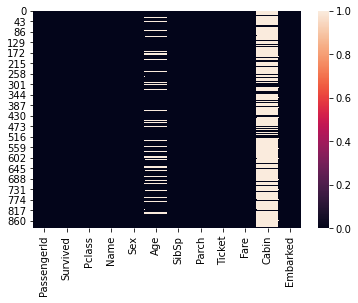

In [12]:
sns.heatmap(train.isnull()) #plotting the null values

Text(0.5, 1.0, 'Survivor counts')

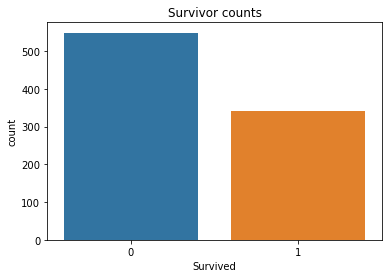

In [13]:
sns.countplot(train['Survived'],data = train).set_title('Survivor counts') #visualizing the survival count

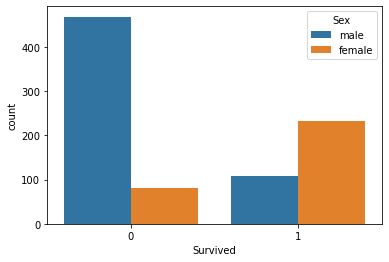

In [14]:
sns.countplot(train['Survived'],data = train,hue = 'Sex') #checking the amount of males and females in our survival set

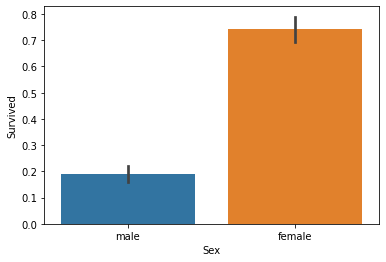

In [15]:
sns.barplot(x='Sex',y='Survived',data = train) #plotting to find out which gender survived the most

In [16]:
train.groupby('Pclass').Survived.mean() #taking the mean of the ssurvived data according to the PClass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

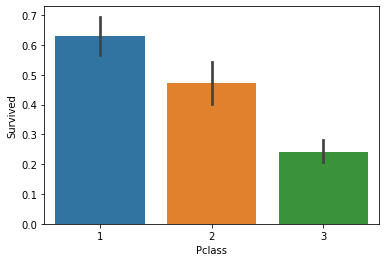

In [17]:
sns.barplot(x='Pclass',y='Survived',data = train) #checking the amount of passengers that survived on basis of PClass

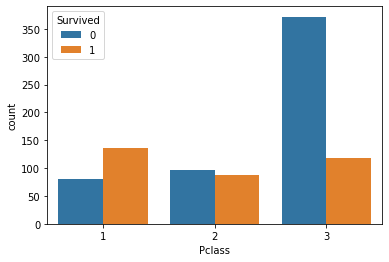

In [18]:
sns.countplot(x='Pclass',hue = 'Survived',data = train)

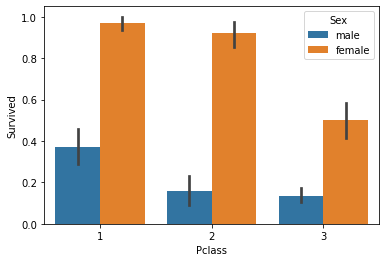

In [19]:
sns.barplot(x='Pclass',y='Survived',hue = 'Sex',data = train) #checking the gender that survived in each Class for better understanding of our data

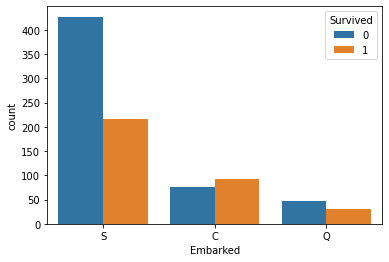

In [20]:
sns.countplot(x='Embarked',hue = 'Survived',data = train) #checking survived count in embarked table

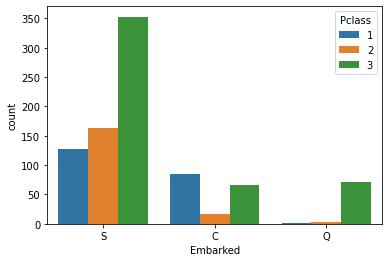

In [21]:
sns.countplot(x='Embarked',hue = 'Pclass',data = train)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train['Name'] #taking out the names from the Name column

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [24]:
train['Title'] = train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()) #splitting the title in order to just preserve the title of a person example Miss/Mr etc.

In [25]:
test['Title'] = test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()) #splitting the title in order to just preserve the title of a person example Miss/Mr etc.

In [26]:
train['Title'].value_counts() #counting the number of titles in order to adjust those titles that are not present inn  huge numbers

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
Lady              1
Jonkheer          1
Ms                1
Don               1
the Countess      1
Sir               1
Mme               1
Name: Title, dtype: int64

In [27]:
train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True) #adjusting the tiles properly in order to reduce the number of rows and adjusting the titles properly. This step is for replacing female titles.
test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

In [28]:
train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)#adjusting the tiles properly in order to reduce the number of rows and adjusting the titles properly. This step is for replacing male titles.
test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

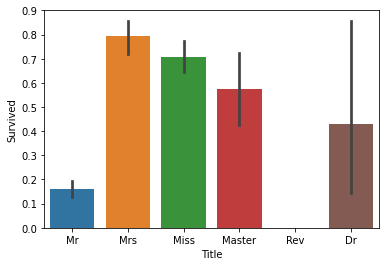

In [29]:
sns.barplot(x='Title',y='Survived',data = train) #visualizing the titles  

In [30]:
train['Family'] = train['SibSp'] + train['Parch'] + 1 #making a column family that has the count of family members onboard
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


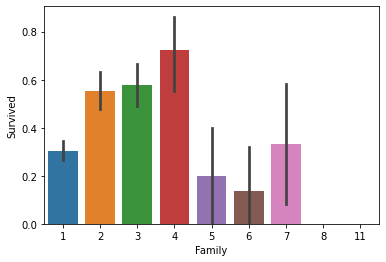

In [32]:
sns.barplot(x='Family',y='Survived',data = train) #checking the number of people in each family

In [33]:
train['Family'] = pd.cut(train.Family, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big']) #dividing the family in various categories
test['Family'] = pd.cut(test.Family, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Solo


In [35]:
y = train['Survived'] #splitting our data
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'Family']
X = train[features]
X.head()

,Pclass,Sex,Fare,Title,Embarked,Family
0,3,male,7.2500,Mr,S,Small
1,1,female,71.2833,Mrs,C,Small
2,3,female,7.9250,Miss,S,Solo
3,1,female,53.1000,Mrs,S,Small
4,3,male,8.0500,Mr,S,Solo


In [36]:
from sklearn.impute import SimpleImputer #importing all of our libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [37]:
numerical_cols = ['Fare'] #creating a pipeline in which we can feed our column values and encode these values in order to make it suitable to be used by our classifier. We cannot feed continuous values hence we have to encode them properly.
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'Family']


numerical_transformer = SimpleImputer(strategy='median')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])

# Preprocessing of training data, fit model 
model.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(model, X, y, cv=10).mean()))

Cross validation score: 0.826


In [38]:
X_test = test[features] #our testing data
X_test.head()

,Pclass,Sex,Fare,Title,Embarked,Family
0,3,male,7.8292,Mr,Q,Solo
1,3,female,7.0000,Mrs,S,Small
2,2,male,9.6875,Mr,Q,Solo
3,3,male,8.6625,Mr,S,Solo
4,3,female,12.2875,Mrs,S,Small


In [39]:
preds = model.predict(X_test) #testing our model our test data

In [40]:
result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': preds}) #saving our results
result.to_csv('submission4.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
